Let's build an undirected graph of kanji relations through their radicals

In [1]:
from jamdict import Jamdict
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Next, initialize all the important stuff

In [2]:
jmd = Jamdict()
kanjis = jmd.krad
G = nx.Graph()
#df_jouyou = pd.read_csv('onyomi_statistics.csv', sep='\t',names=['kanji','read'])
#jouyou = list(df_jouyou['kanji'])

Building the undirected graph. We crawl the Kanjis one-by-one and add an edge to all of its components, provided the component (radical) is a kanji itself.

In [3]:
for k in kanjis.keys():
    neighPool = kanjis[k]
    for n in neighPool:
        if n in kanjis and not G.add_edge(k,n):
            G.add_edge(k,n)

<ipython-input-5-dff1ea0dd990>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


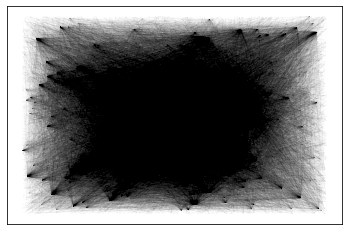

In [5]:
fig, ax = plt.subplots()
pos = nx.random_layout(G)
nx.draw_networkx(G, pos, with_labels=False, ax=ax, node_size=0, width=0.01)
fig.show()

Looks scary enough!

In [7]:
len(G.nodes)

13090

In [8]:
len(G.edges)

49975

In [9]:
nx.number_connected_components(G)

1

We got a big, fully connected graph